<a href="https://colab.research.google.com/github/Amrishpurigoswami/first-/blob/main/animal_classificetion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D ,Flatten ,Dense


# **LOAD DATASET**

In [19]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')
X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [20]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train=Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test=Y_test.reshape(len(Y_test), 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [21]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ",  X_test.shape)
print("Shape of Y_test: ", Y_test.shape )

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


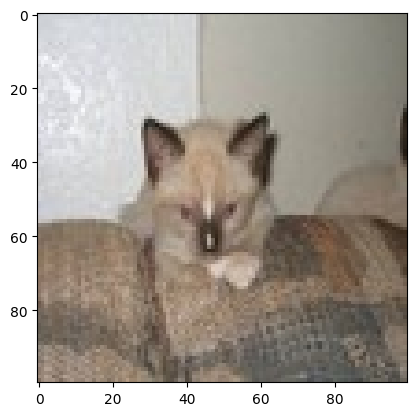

In [75]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx])
plt.show()

# **Model**

In [76]:
model = Sequential ([
 Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
 MaxPooling2D((2,2)),

 Conv2D(32, (3,3), activation = 'relu'),
 MaxPooling2D((2,2)),
 Flatten(),
 Dense (64, activation = 'relu'),
 Dense (1, activation = 'sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
model=Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense (64, activation = 'relu'))
model.add(Dense (1, activation = 'sigmoid'))

In [78]:
#opt = keras.optimizers.SGD(learning_rate=0.001)
#SGD AND ADAM
#model.compile(optimizer = 'opt', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [79]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 914ms/step - accuracy: 0.5048 - loss: 0.7775
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 809ms/step - accuracy: 0.5419 - loss: 0.6808
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 43s 865ms/step - accuracy: 0.6349 - loss: 0.6326
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 882ms/step - accuracy: 0.7292 - loss: 0.5628
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 867ms/step - accuracy: 0.7547 - loss: 0.5084


In [80]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.7203 - loss: 0.5357


[0.5828864574432373, 0.6875]

# **Making Prediction**

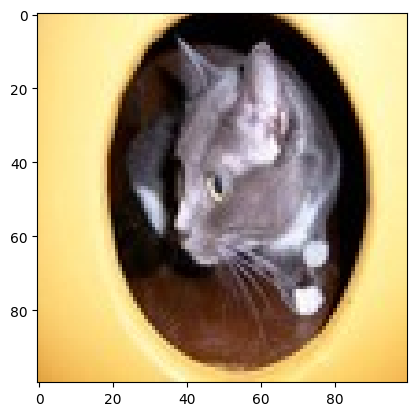

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[[0.50368476]]
our model say itis a:  Cat 


In [83]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2,:])
#imshow
plt.show()
y_pred = model.predict(X_test [idx2, :].reshape(1, 100, 100, 3))
print(y_pred)
y_pred = y_pred > 0.5
if (y_pred == 0):
 pred= " Dog "
else:
 pred = " Cat "
print("our model say itis a:", pred)